<a href="https://colab.research.google.com/github/vmkainga/Feature-Engineering-with-Python-Project/blob/main/Feature_Engineering_with_Python_Project_Violet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='#2F4F4F'>. Defining the Question</font>

### a) Specifying the Data Analysis Question

Sendy has hired you to help predict the estimated time of delivery of orders, from the
point of driver pickup to the point of arrival at the final destination. Build a model that
predicts an accurate delivery time, from picking up a package arriving at the final
destination


### b) Defining the Metric for Success

The metrics we will use to evaluate our model are RMSE

### c) Understanding the Context 

Logistics in Sub-Saharan Africa increases the cost of manufactured goods by up to
320%; while in Europe, it only accounts for up to 90% of the manufacturing cost. Sendy
is a business-to-business platform established in 2014, to enable businesses of all types
and sizes to transport goods more efficiently across East Africa. The company is
headquartered in Kenya with a team of more than 100 staff, focused on building practical
solutions for Africa’s dynamic transportation needs, from developing apps and web
solutions to providing dedicated support for goods on the move.


Sendy has hired you to help predict the estimated time of delivery of orders, from the
point of driver pickup to the point of arrival at the final destination. Build a model that
predicts an accurate delivery time, from picking up a package arriving at the final
destination. An accurate arrival time prediction will help all business to improve their
logistics and communicate the accurate time their time to their customers. You will be
required to perform various feature engineering techniques while preparing your data for
further analysis.


### d) Recording the Experimental Design

* Defining the Research Question
* Data Importation
* Data Exploration
* Data Cleaning
* Data Analysis
* Data Preparation
* Data Modeling
* Model Evaluation
* Challenging your Solution
* Recommendations / Conclusion 

### e) Data Relevance

The data provided was relevant to answering the research question.

# <font color='#2F4F4F'>1. Data Cleaning & Preparation</font>

In [185]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.columns', None)
pd.set_option('display.max_colwidth', None)
%matplotlib inline


In [192]:
# loading and previewing dataset
df = pd.read_csv('https://bit.ly/3deaKEM')
df.sample(3)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
1655,Order_No_1071,User_Id_238,Bike,3,Business,22,5,11:29:33 AM,22,5,11:29:58 AM,22,5,11:36:53 AM,22,5,11:39:23 AM,22,5,12:04:45 PM,15,NaN,NaN,-1.307787,36.844321,-1.362953,36.904214,Rider_Id_114,1522
19251,Order_No_3293,User_Id_3147,Bike,3,Business,12,2,12:37:29 PM,12,2,12:38:16 PM,12,2,1:22:16 PM,12,2,1:30:30 PM,12,2,1:42:02 PM,4,24.7,NaN,-1.347207,36.769264,-1.320511,36.780102,Rider_Id_328,692
11718,Order_No_545,User_Id_2229,Bike,3,Business,10,1,9:10:46 AM,10,1,9:11:21 AM,10,1,9:58:44 AM,10,1,10:10:19 AM,10,1,10:52:34 AM,20,16.4,NaN,-1.324768,36.858030,-1.236702,36.875872,Rider_Id_48,2535


In [187]:
# loading glossary
glossary = pd.read_csv('https://bit.ly/30O3xsr', header = None)
glossary.head(5)

,0,1
0,Order No,Unique number identifying the order
1,User Id,Unique number identifying the customer on a platform
2,Vehicle Type,"For this competition limited to bikes, however in practice Sendy service extends to trucks and vans"
3,Platform Type,"Platform used to place the order, there are 4 types"
4,Personal or Business,Customer type


In [188]:
# checking dataset shape
df.shape

(21201, 29)

In [107]:
# checking data types
df.dtypes

Order No                                      object
User Id                                       object
Vehicle Type                                  object
Platform Type                                  int64
Personal or Business                          object
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Placement - Time                              object
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Confirmation - Time                           object
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Arrival at Pickup - Time                      object
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Pickup - Time                                 object
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)     

In [193]:
#convert 'Personal or Business' column into numerical

df['Personal or Business'] = df['Personal or Business'].replace({'Business' : 1, 'Personal' : 0})

In [194]:
#obtain numeric value from rider id
df[['Rider','id','Rider Id']]=df['Rider Id'].str.split('_', expand=True)


In [118]:
df.isnull().sum()

Platform Type                                   0
Personal or Business                            0
Placement - Day of Month                        0
Placement - Weekday (Mo = 1)                    0
Confirmation - Day of Month                     0
Confirmation - Weekday (Mo = 1)                 0
Arrival at Pickup - Day of Month                0
Arrival at Pickup - Weekday (Mo = 1)            0
Pickup - Day of Month                           0
Pickup - Weekday (Mo = 1)                       0
Arrival at Destination - Day of Month           0
Arrival at Destination - Weekday (Mo = 1)       0
Distance (KM)                                   0
Temperature                                  4366
Rider Id                                        0
Time from Pickup to Arrival                     0
Rider                                           0
id                                              0
dtype: int64

In [195]:
#replacing null values in temperature with mode

df['Temperature'].fillna(df['Temperature'].mode()[0], inplace=True)

In [197]:

#selecting useful columns
df=df[['Platform Type', 'Personal or Business','Placement - Day of Month','Placement - Weekday (Mo = 1)','Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)', 'Arrival at Pickup - Day of Month','Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Arrival at Destination - Day of Month','Arrival at Destination - Weekday (Mo = 1)','Distance (KM)','Temperature','Rider Id', 'Time from Pickup to Arrival']]


In [198]:
# getting the records with outliers
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

outliers_df = df[((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis = 1)]
print(outliers_df.shape)
outliers_df.shape

(5170, 16)


(5170, 16)

In [199]:
df.shape

(21201, 16)

It would be tricky to drop the records with outliers for now since that will reduce our dataset by a fifth so we will leave them there.

In [200]:
#changing object columns into int
df['Personal or Business']= df['Personal or Business'].astype(int)
df['Rider Id'] = df['Rider Id'].astype(int)




In [201]:
#previewing df

df.head()

,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Rider Id,Time from Pickup to Arrival
0,3,1,9,5,9,5,9,5,9,5,9,5,4,20.4,432,745
1,3,0,12,5,12,5,12,5,12,5,12,5,16,26.4,856,1993
2,3,1,30,2,30,2,30,2,30,2,30,2,3,24.7,155,455
3,3,1,15,5,15,5,15,5,15,5,15,5,9,19.2,855,1341
4,1,0,13,1,13,1,13,1,13,1,13,1,9,15.4,770,1214


# <font color='#2F4F4F'>2. Data Analysis</font>

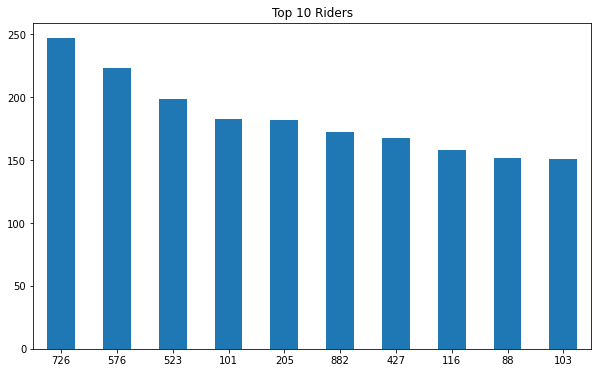

In [134]:
# getting the top 10 most common riders
plt.figure(figsize = (10, 6))
df['Rider Id'].value_counts()[:10].plot(kind = 'bar', rot = 0)
plt.title("Top 10 Riders")
plt.show()

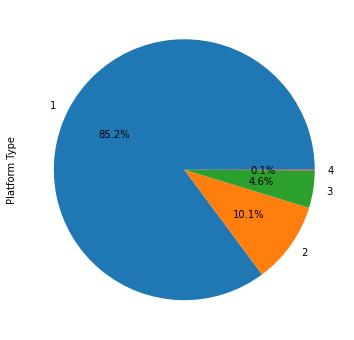

In [121]:
# getting the most common platform
plt.figure(figsize = (6, 6))

labels = ['1', '2', '3', '4']

df['Platform Type'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%', labels = labels)
plt.show()

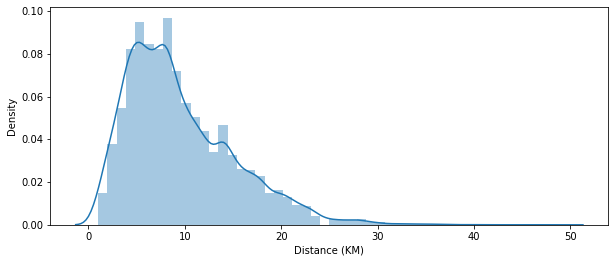

In [88]:
# distribution of distance
plt.figure(figsize = (10,4))
sns.distplot(df['Distance (KM)'])
plt.show()

In [203]:
# average delivery time per Customer Type
df.groupby('Personal or Business')['Time from Pickup to Arrival'].mean().sort_values(ascending = False)


Personal or Business
0    1585.056327
1    1550.743270
Name: Time from Pickup to Arrival, dtype: float64

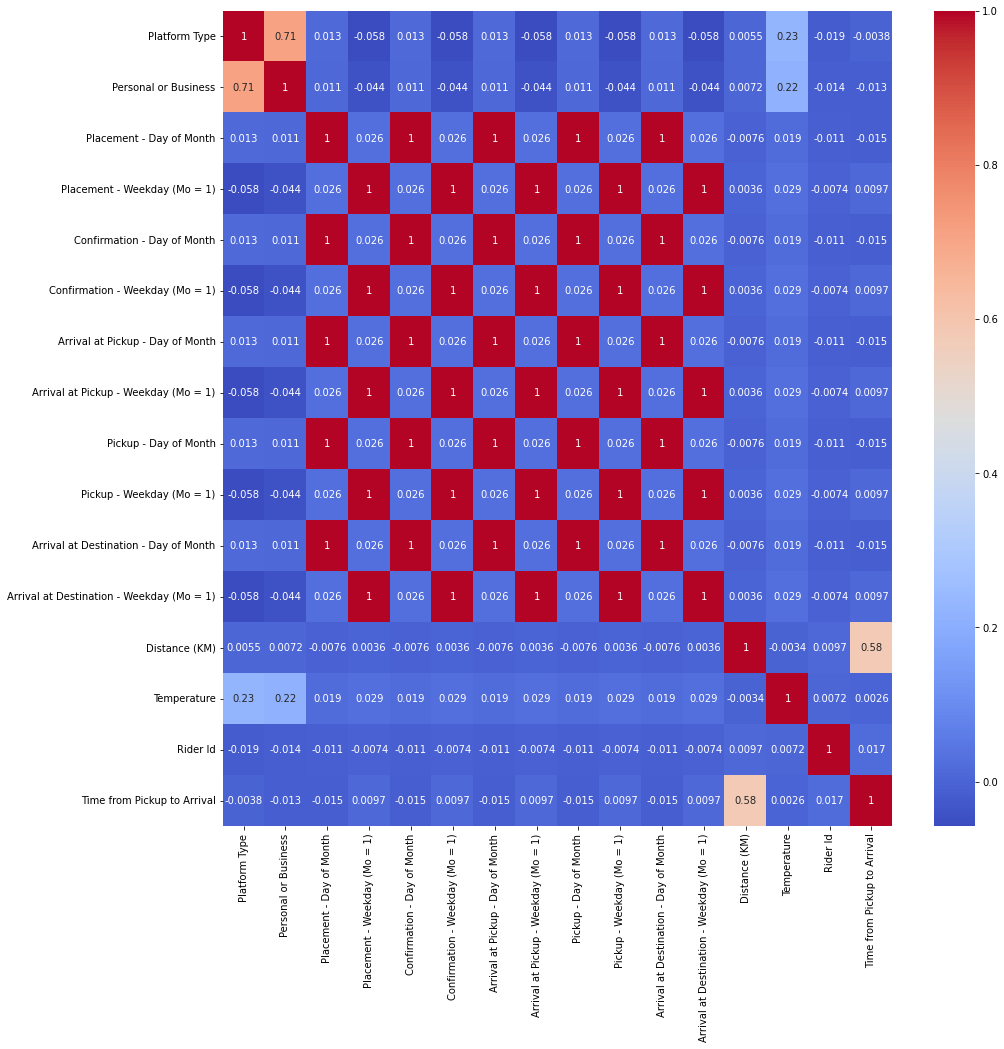

In [161]:
# visualizing the correlations between the variables
corr = df.corr()

plt.figure(figsize = (15, 15))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()

# <font color='#2F4F4F'>2. Data Modeling</font>

In [162]:
import warnings
warnings.filterwarnings("ignore")

# importing utility modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
 
# importing machine learning models for prediction
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression
 

 
# getting target  from the dataframe
y = df["Time from Pickup to Arrival"]
 
# getting features from the dataframe
X = df.drop(columns=["Time from Pickup to Arrival"])
 
# Splitting between train data into training and validation dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20)
 
# initializing all the model objects with default parameters
model_1 = LinearRegression()
model_2 = xgb.XGBRegressor()
model_3 = RandomForestRegressor()
 
# training all the model on the training dataset
model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)
 
# predicting the output on the validation dataset
pred_1 = model_1.predict(X_test)
pred_2 = model_2.predict(X_test)
pred_3 = model_3.predict(X_test)
 
# final prediction after averaging on the prediction of all 3 models
pred_final = (pred_1+pred_2+pred_3)/3.0
 
# printing the root mean squared error between real value and predicted value
print(np.sqrt(mean_squared_error(y_test, pred_final)))

[21:17:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
800.566547066277


## 3. Feature Engineering

In [175]:
# dropping duplicates, if any
df.drop_duplicates(inplace = True)
df.shape

(21201, 16)

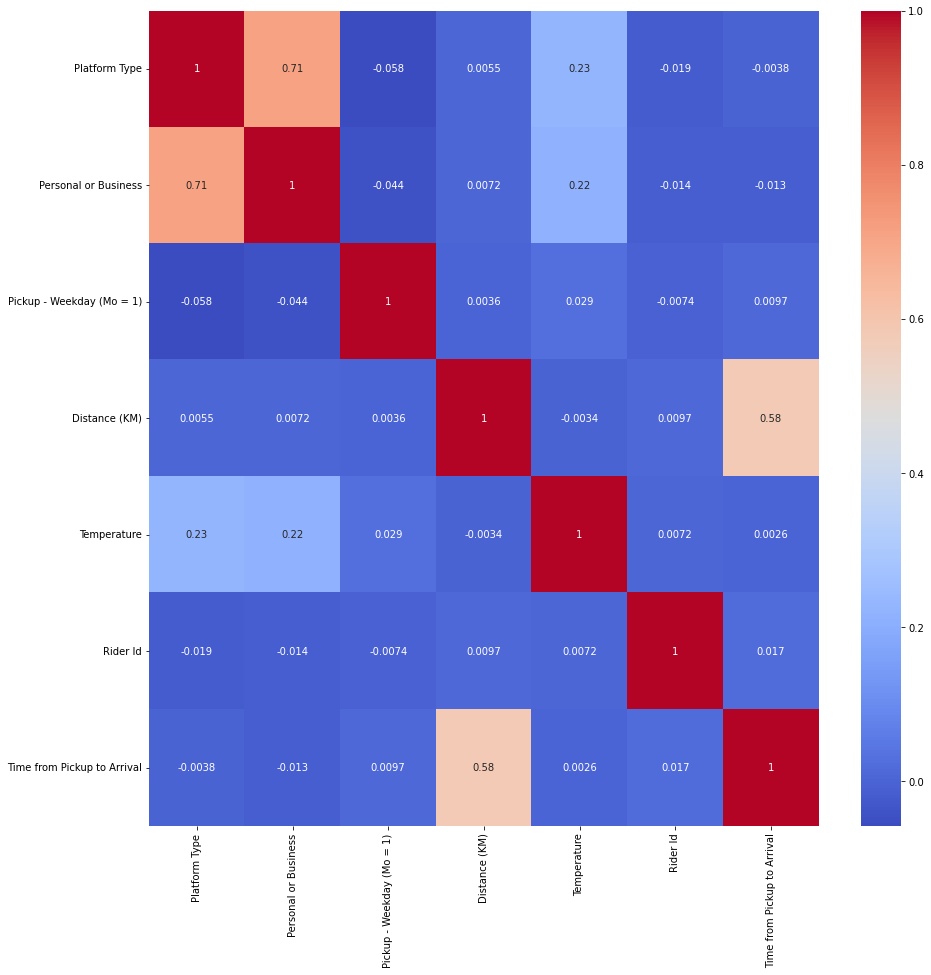

In [176]:
#removing multicolinearity
df=df.drop(columns=['Arrival at Pickup - Weekday (Mo = 1)','Pickup - Day of Month' ,'Arrival at Destination - Weekday (Mo = 1)', 'Placement - Day of Month','Placement - Weekday (Mo = 1)','Confirmation - Day of Month','Confirmation - Weekday (Mo = 1)','Arrival at Pickup - Day of Month','Arrival at Destination - Day of Month'])


corr = df.corr()

plt.figure(figsize = (15, 15))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()

In [177]:
#creating new feature, speed
df['speed']=df['Distance (KM)']/df['Time from Pickup to Arrival']



In [178]:
df.head()

,Platform Type,Personal or Business,Pickup - Weekday (Mo = 1),Distance (KM),Temperature,Rider Id,Time from Pickup to Arrival,speed
0,3,1,5,4,20.4,432,745,0.005369
1,3,0,5,16,26.4,856,1993,0.008028
2,3,1,2,3,24.7,155,455,0.006593
3,3,1,5,9,19.2,855,1341,0.006711
4,1,0,1,9,15.4,770,1214,0.007414


In [179]:
df.isnull().sum()

Platform Type                  0
Personal or Business           0
Pickup - Weekday (Mo = 1)      0
Distance (KM)                  0
Temperature                    0
Rider Id                       0
Time from Pickup to Arrival    0
speed                          0
dtype: int64

In [181]:
# getting target  from the dataframe
y = df["Time from Pickup to Arrival"]
 
# getting features from the dataframe
X = df.drop(columns=["Time from Pickup to Arrival"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20)
 

In [182]:
# scaling our features
from sklearn.preprocessing import MinMaxScaler  
norm = MinMaxScaler().fit(X_train) 
X_train = norm.transform(X_train) 
X_test = norm.transform(X_test)

In [183]:
#use PCA in feature transformation
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [184]:
#Retraining model, predicting and checking accuracy

model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)
 
# predicting the output on the validation dataset
pred_1 = model_1.predict(X_test)
pred_2 = model_2.predict(X_test)
pred_3 = model_3.predict(X_test)
 
# final prediction after averaging on the prediction of all 3 models
pred_final = (pred_1+pred_2+pred_3)/3.0
 
# printing the root mean squared error between real value and predicted value
print(np.sqrt(mean_squared_error(y_test, pred_final)))

[21:34:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
693.367757737764


# <font color='#2F4F4F'>5. Summary of Findings</font>
-RMSE improved from 800 to 693 after performing feature engineering

-85% of the orders were made via one of the 4 platforms

-Feature engineering aspects of cleaning data, feature scaling and transformation, removing of null values etc improves the performance of a machine learning model

-Average delivery time for the two customer types is almost similar(very small difference noted )

# <font color='#2F4F4F'>6. Challenging your Solution</font>

### a) Did we have the right question?
Yes

### b) Did we have the right data?
Yes, the data we had was sufficient to answer the research question

### c) What can be done to improve the solution?
Perform more feature engineering

Hyperparameter tuning

Get more data to train